# Prova Data Science N1

## <font color='red'>Importante: a prova é individual.</font>

**Instruções:**

1. Faça download deste notebook e carregue o mesmo na sua conta do Google Colab.
2. Responda às questões propostas.
3. Crie um repositório para o notebook, "commite" o notebook neste repositório.
4. Na tarefa de avaliação do Teams, envie o link do repositório. Arquivos enviados diretamente no Teams não serão considerados.
5. Commits no repositório após a data de entrega (combinada em sala de aula) serão desconsiderados.

# Objeto da avaliação

Você irá fazer o download do arquivo de dados matches.csv do [repositório do Github](https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv)

Todas as questões/atividades serão realizadas com base neste arquivo. É importante que você responda aos questionamentos propostos o mais completo possível, com a maior quantidade de detalhes que você conseguir incluir.

Não se contente com o básico, seja criativo nas respostas, indo além do tradicional.

## **Importante!!**

Antes de começar a responder, abra o arquivo de dados e entenda o dataset. Não será fornecido um dicionário de dados, é sua tarefa analisar o dataset e "inferir" o que são as colunas e a sua organização.

## Instalação de bibliotecas necessárias

Instale neste local todas as bibliotecas necessárias para resolução da avaliação.

In [3]:
# Instalação de bibliotecas básicas
!pip install pandas numpy matplotlib seaborn
!pip install beautifulsoup4 requests
!pip install plotly pandas
!pip install dash


## Estatísticas básicas do dataset


Carregue o arquivo de dados no notebook e exiba as características básicas do arquivo (shape, tipo de dados, dados ausentes, estatísticas básicas dos dados, etc)

In [4]:
# Responda aqui a primeira etapa
import pandas as pd

# Carregar o arquivo CSV
df = pd.read_csv('/content/matches.csv')

# Exibir características básicas do dataset
print("Shape do dataset:", df.shape)
print("\nTipos de dados:\n", df.dtypes)
print("\nDados ausentes:\n", df.isnull().sum())
print("\nEstatísticas básicas:\n", df.describe(include='all'))


Shape do dataset: (1389, 28)

Tipos de dados:
 Unnamed: 0        int64
date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

Dados ausentes:
 Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                

## Dia da semana com placares mais altos

Crie um gráfico que responda em qual dia da semana os placares foram mais altos. O conceito de "placar mais alto" é a soma dos gols feitos no jogo.

Como a quantidade de jogos não é a mesma em todos os dias da semana (finais de semana tendem a ter mais jogos que em dias da semana - o que resultaria em placares mais altos nestes dias), você deverá encontrar uma forma de equalizar esta diferença na quantidade de jogos.

A resposta deverá ser um gráfico que demonstre claramente o comparativo dos dias.

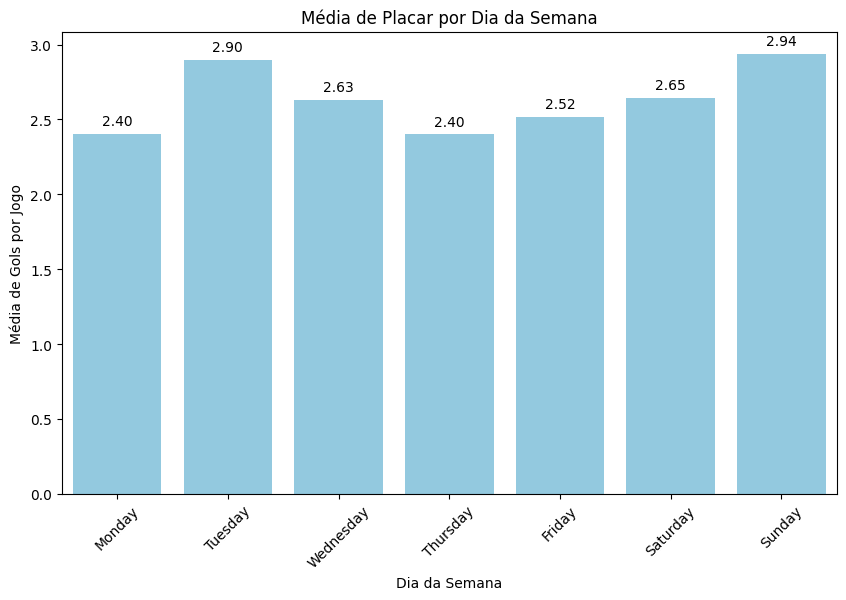

In [5]:
# Responda aqui a etapa
import matplotlib.pyplot as plt
import seaborn as sns

# Convertendo a coluna 'date' para o tipo datetime e extraindo o dia da semana
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()

# Calcular a soma dos gols feitos em cada jogo
df['total_goals'] = df['gf'] + df['ga']

# Calcular a média de gols por dia da semana
# Agrupar pelo dia da semana e calcular a média de gols por jogo
average_goals_per_day = df.groupby('day_of_week').apply(
    lambda x: x['total_goals'].sum() / len(x)
).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotar o gráfico
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=average_goals_per_day.index, y=average_goals_per_day.values, color='skyblue')
plt.title('Média de Placar por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Média de Gols por Jogo')
plt.xticks(rotation=45)

# Adicionar rótulos aos valores das barras
for bar in bars.patches:
    bars.annotate(
        format(bar.get_height(), '.2f'),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center', va='center',
        xytext=(0, 9),  # Ajuste a posição do rótulo
        textcoords='offset points'
    )

plt.show()


## Capitães

Quantos capitães diferentes cada equipe teve durante a temporada?

Responda em forma de um gráfico comparativo, apresentando os dados o mais claramente possível.

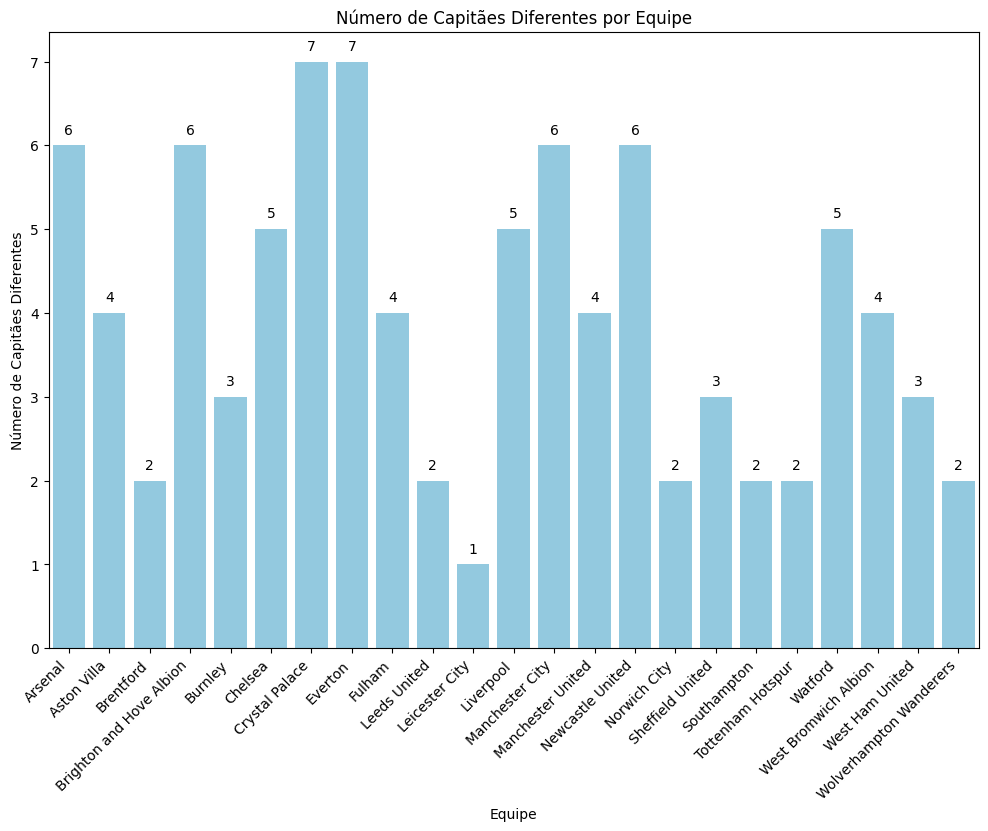

In [6]:
# Responda a etapa aqui

# Contar o número de capitães diferentes para cada equipe
capitains_per_team = df.groupby('team')['captain'].nunique().reset_index()

# Renomear as colunas para clareza
capitains_per_team.columns = ['Equipe', 'Número de Capitães Diferentes']

# Plotar o gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x='Equipe', y='Número de Capitães Diferentes', data=capitains_per_team, color='skyblue')

plt.title('Número de Capitães Diferentes por Equipe')
plt.xlabel('Equipe')
plt.ylabel('Número de Capitães Diferentes')
plt.xticks(rotation=45, ha='right')

# Adicionar rótulos aos valores das barras
for index, row in capitains_per_team.iterrows():
    plt.text(
        index, row['Número de Capitães Diferentes'] + 0.1,  # Ajuste o valor de deslocamento se necessário
        row['Número de Capitães Diferentes'],
        ha='center', va='bottom'
    )

plt.show()

## Formação Tática

Qual a formação tática mais comum para cada equipe de acordo com o resultado obtido (Ex: para vitórias, a formação mais comum é X, para empates Y e para Z em derrotas).

**Importante** responda de forma que seja possível fazer comparativos entre equipes.

Responda com um gráfico.

<ipython-input-7-00993ee6987d>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-7-00993ee6987d>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-7-00993ee6987d>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


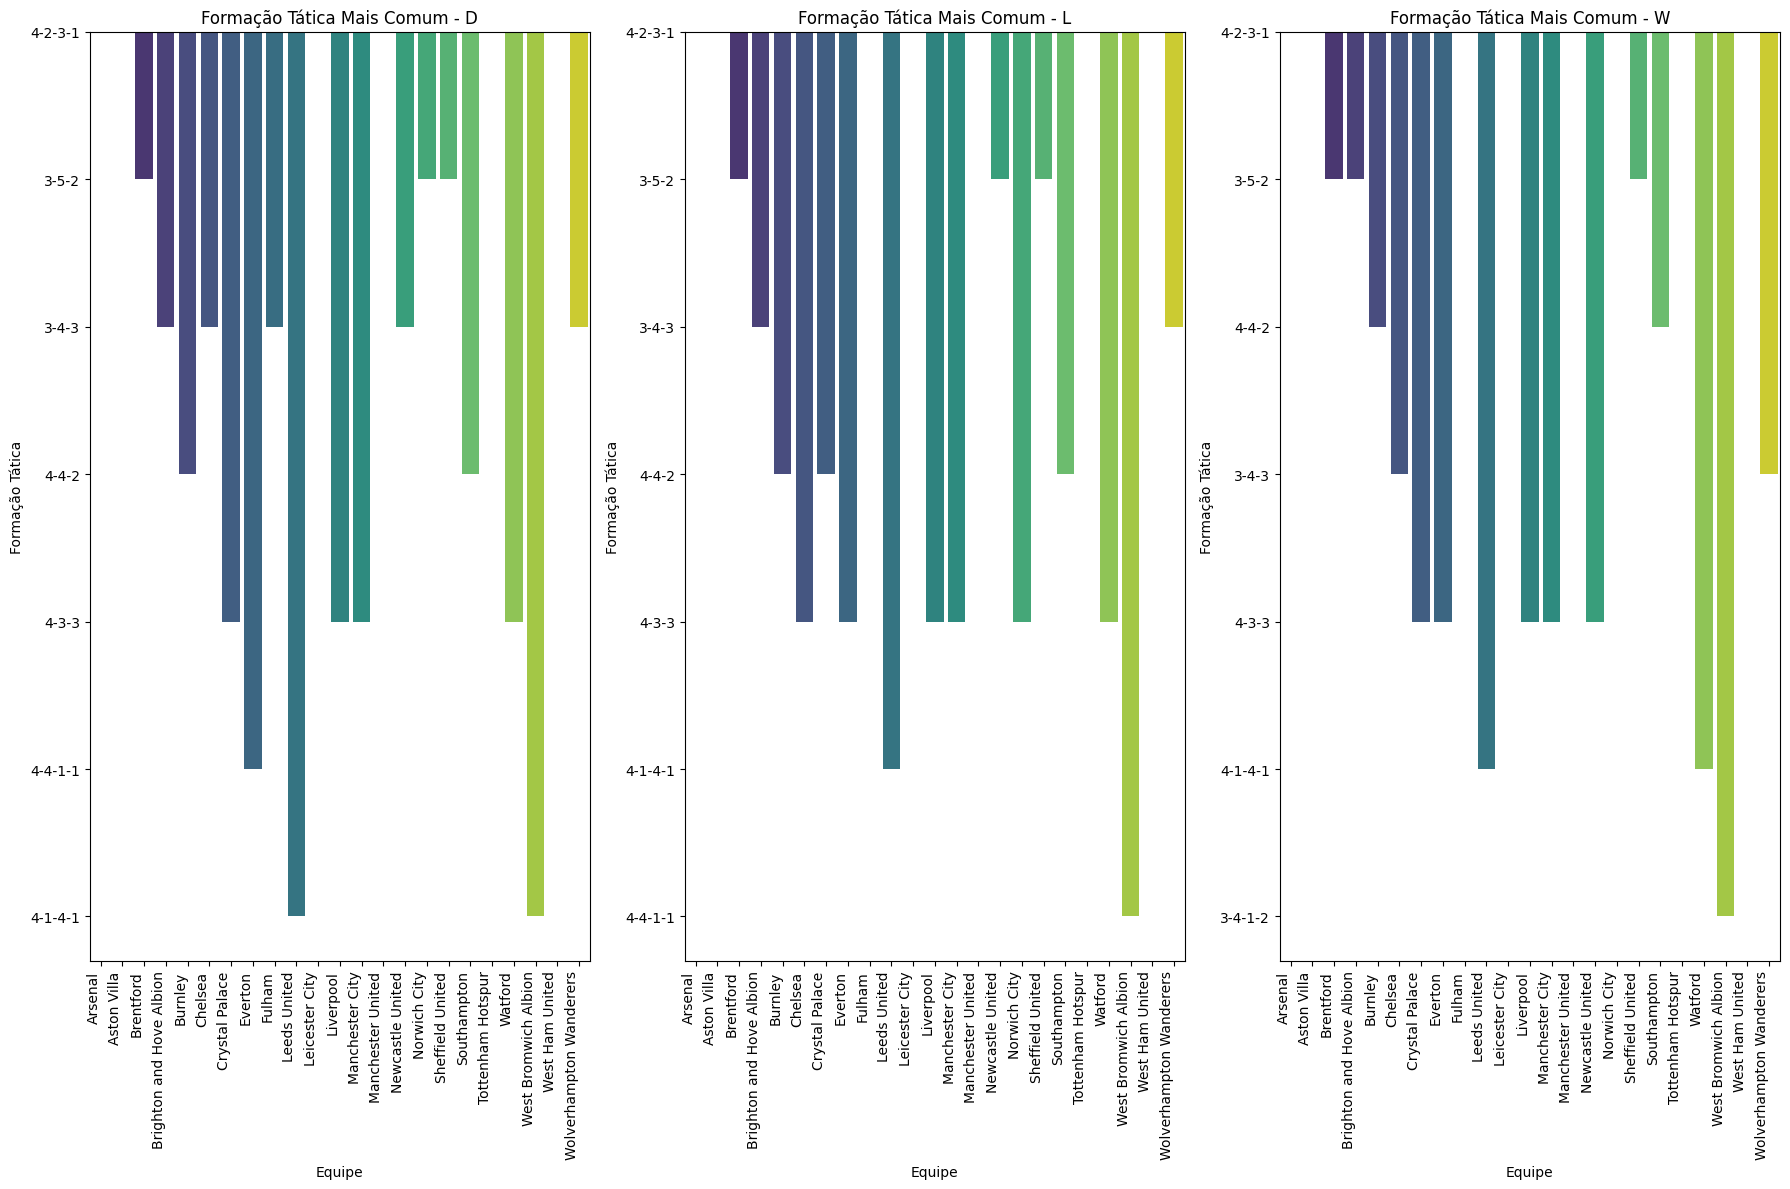

In [7]:
# Responda a etapa aqui

# Convertendo o resultado para categorias
df['result'] = df['result'].astype('category')

# Encontrar a formação tática mais comum por equipe e resultado
most_common_formations = df.groupby(['team', 'result'], observed=False)['formation'].agg(lambda x: x.mode().iloc[0]).reset_index()

# Renomear as colunas para clareza
most_common_formations.columns = ['Equipe', 'Resultado', 'Formação Tática']

# Configurações do gráfico
results = most_common_formations['Resultado'].unique()

# Criar uma figura para os gráficos
plt.figure(figsize=(18, 12))

# Plotar um gráfico para cada tipo de resultado
for i, result in enumerate(results):
    plt.subplot(1, 3, i + 1)
    subset = most_common_formations[most_common_formations['Resultado'] == result]

    # Usar um gráfico de barras para cada resultado
    sns.barplot(
        x='Equipe',
        y='Formação Tática',
        data=subset,
        errorbar=None,  # Remove o intervalo de confiança
        palette='viridis'  # Definindo a paleta de cores
    )

    plt.title(f'Formação Tática Mais Comum - {result.capitalize()}')
    plt.xlabel('Equipe')
    plt.ylabel('Formação Tática')
    plt.xticks(rotation=90, ha='right')  # Ajustar rotação para leitura melhor

plt.tight_layout()
plt.show()

## Posse de bola

Qual a média de posse de bola da equipe mandante quando ela perdeu o jogo?

Responda em forma de gráfico para poder comparar entre todas as equipes.

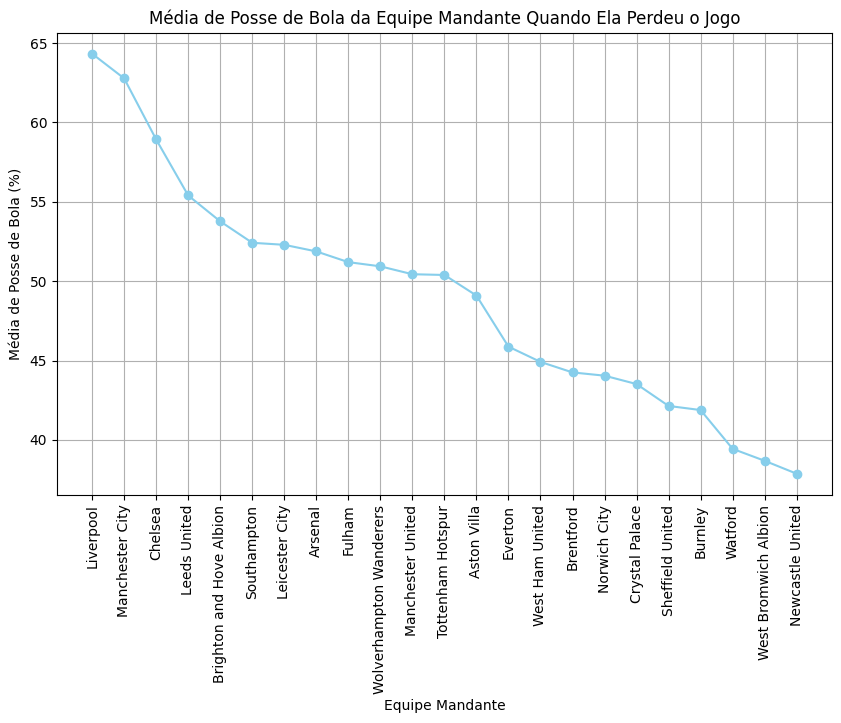

In [8]:
# Responda aqui a etapa

# Filtrar os jogos em que a equipe mandante perdeu (supondo que 'result' contém "Loss" para derrotas)
mandante_perdeu = df[df['result'] == 'L']

# Calcular a média da posse de bola (coluna 'poss') para cada equipe mandante (coluna 'team')
media_posse_mandante = mandante_perdeu.groupby('team')['poss'].mean().reset_index()

# Renomear a coluna para algo mais descritivo
media_posse_mandante.columns = ['Equipe Mandante', 'Média de Posse de Bola']

# Ordenar os valores da média de posse de bola para melhor visualização
media_posse_mandante = media_posse_mandante.sort_values(by='Média de Posse de Bola', ascending=False)

plt.figure(figsize=(10,6))
plt.plot(media_posse_mandante['Equipe Mandante'], media_posse_mandante['Média de Posse de Bola'], marker='o', linestyle='-', color='skyblue')
plt.xticks(rotation=90)  # Rotacionar os nomes das equipes para melhor visualização
plt.xlabel('Equipe Mandante')
plt.ylabel('Média de Posse de Bola (%)')
plt.title('Média de Posse de Bola da Equipe Mandante Quando Ela Perdeu o Jogo')
plt.grid(True)
plt.show()


## Classificação

Qual a classificação final do campeonato?

Responda em forma de tabela, ordenada do primeiro colocado ao último.
Você deverá apresentar o brasão do time (pode ser obtido online [aqui](https://logodetimes.com/premier-league/), mas automatize a busca, não salve o logo localmente), o nome, a quantidade de pontos e a posição final no campeonato.

**OBS** Vitória vale 3 pontos, empates 1 ponto e derrota 0 pontos.

In [9]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from IPython.display import Image, display, HTML

# Carregar o dataset
url = 'https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv'
df = pd.read_csv(url)

# Calcular pontos com base na coluna 'result'
def calculate_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    elif result == 'L':
        return 0
    return 0

# Aplicar a função para calcular os pontos
df['points'] = df['result'].apply(calculate_points)

# Inicializar o DataFrame para pontos
points_df = df[['team', 'points']].copy()

# Agrupar os pontos por time e somar
points_df = points_df.groupby('team').sum().reset_index()

# Ordenar por pontos
points_df = points_df.sort_values(by='points', ascending=False).reset_index(drop=True)

# Adicionar a posição final
points_df['Position'] = points_df.index + 1

# Função para obter o brasão do time
def get_team_logo_from_scraping(team_name):
    base_url = 'https://logodetimes.com/premier-league/'
    response = requests.get(base_url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        img_tags = soup.find_all('img')
        for img in img_tags:
            if team_name.lower() in img['alt'].lower():
                return img['src']
    return None

# Obter o logo de cada time e adicionar ao DataFrame
def fetch_logos(df):
    logos = []
    for team in df['team']:
        logo_url = get_team_logo_from_scraping(team)
        logos.append(logo_url if logo_url else 'https://via.placeholder.com/50')
    df['logo'] = logos
    return df

# Adicionar logos ao DataFrame
points_df = fetch_logos(points_df)

# Reordenar as colunas para seguir a ordem solicitada
points_df = points_df[['logo', 'team', 'points', 'Position']]

# Função para exibir a tabela com brasões, nomes e pontos
def display_classification_table(df):
    # Tabela HTML para visualização
    html = df.to_html(escape=False, formatters={'logo': lambda x: f'<img src="{x}" width="50" height="50">'})
    display(HTML(html))

# Exibir a tabela com classificação
display_classification_table(points_df)


,logo,team,points,Position
0,,Manchester City,166,1
1,,Chelsea,132,2
2,,Manchester United,128,3
3,,Arsenal,121,4
4,,Tottenham Hotspur,120,5
5,,West Ham United,117,6
6,,Leicester City,108,7
7,,Wolverhampton Wanderers,94,8
8,,Leeds United,93,9
9,,Aston Villa,92,10


## Público

Crie uma visualização que apresente o público total de cada equipe, e também um detalhamento por jogos.

Apresentar os dados usando a técnica "DrillDown" será considerado um "plus". A visualização DrillDown permite que gráficos sejam detalhados com cliques em itens do gráfico.

Um exemplo com tabelas pode ser encontrado [aqui](https://dash.plotly.com/dash-ag-grid/enterprise-master-detail).

Um exemplo usando gráficos pode ser encontrado [aqui](https://community.plotly.com/t/show-and-tell-drill-down-functionality-in-dash-using-callback-context/54403?u=atharvakatre)

Quando a internet está lenta, não carrega os gráficos drilldown, por esse motivo gravei o funcionamento, esse link expira em 14 dias, caso não esteja disponível posso enviar no teams.

https://www.loom.com/share/b816662e8be44feab140e46233873226?sid=415015c9-7d37-44ea-b953-7bcd11b6ad78

In [12]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objects as go

# Carregar o dataset
url = 'https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv'
df = pd.read_csv(url)

# Calcular o público total por equipe
total_attendance = df.groupby('team')['attendance'].sum().reset_index()

# Preparar os dados para detalhamento por jogo
detailed_attendance = df[['team', 'date', 'attendance']].copy()

# Inicializar o app Dash
app = dash.Dash(__name__)

# Layout da aplicação
app.layout = html.Div([
    dcc.Graph(id='bar-chart'),
    dcc.Graph(id='scatter-chart')
])

# Callback para atualizar os gráficos
@app.callback(
    Output('scatter-chart', 'figure'),
    [Input('bar-chart', 'clickData')]
)
def update_scatter_chart(clickData):
    if clickData:
        selected_team = clickData['points'][0]['x']
        filtered_df = detailed_attendance[detailed_attendance['team'] == selected_team]
    else:
        filtered_df = detailed_attendance

    scatter_figure = go.Figure()
    scatter_figure.add_trace(go.Scatter(
        x=filtered_df['date'],
        y=filtered_df['attendance'],
        mode='markers',
        marker=dict(size=10, color='red', opacity=0.6),
        text=filtered_df.apply(lambda row: f"Data: {row['date']}<br>Público: {row['attendance']}", axis=1)
    ))

    scatter_figure.update_layout(
        title='Detalhamento por Jogos',
        xaxis_title='Data',
        yaxis_title='Público por Jogo'
    )

    return scatter_figure

# Configuração do gráfico de barras
app.layout.children[0].figure = go.Figure(data=[
    go.Bar(
        x=total_attendance['team'],
        y=total_attendance['attendance'],
        name='Público Total',
        marker=dict(color='blue'),
        hoverinfo='x+y'
    )
])

app.layout.children[0].figure.update_layout(
    title='Público Total por Equipe',
    xaxis_title='Equipe',
    yaxis_title='Público Total'
)

# Rodar o servidor
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

Caso o drilldown não rode devido a velocidade da internet e o vídeo não seja válido para a N1, tem uma opção sem drilldown

In [11]:
import plotly.express as px

# Calcular o público total por equipe
total_attendance = df.groupby('team')['attendance'].sum().reset_index()

# Detalhamento do público por jogo
detailed_attendance = df[['team', 'date', 'attendance']]

# Gráfico de público total
fig1 = px.bar(total_attendance, x='team', y='attendance', title='Público Total por Equipe')
fig1.show()

# Gráfico detalhado por jogos
fig2 = px.scatter(detailed_attendance, x='date', y='attendance', color='team', title='Público por Jogo')
fig2.show()
